<a href="https://colab.research.google.com/github/Tawanss/football/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("/content/drive/MyDrive/miniproject_football/footballmatch_PR.csv")

In [4]:
data.columns

Index(['Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTR', 'HS',
       'AS', 'HST', 'AST', 'HC', 'AC', 'B365H', 'B365D', 'B365A', 'AvgH',
       'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5',
       'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'AvgAHH', 'AvgAHA'],
      dtype='object')

In [5]:
x = data[["HomeTeam","AwayTeam","FTHG","FTAG","HS","AS","HST","AST",'B365H', 'B365D', 'B365A','B365>2.5', 'B365<2.5','FTR']]

In [6]:
#rename
x.rename(columns={'FTHG': 'homegoals', 'FTAG': 'awaygoals','FTR':'winner'}, inplace=True)

<ipython-input-6-1ba123050cb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.rename(columns={'FTHG': 'homegoals', 'FTAG': 'awaygoals','FTR':'winner'}, inplace=True)


In [7]:
x["sumgolas"] = x["homegoals"] + x["awaygoals"]

<ipython-input-7-5113644ba2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["sumgolas"] = x["homegoals"] + x["awaygoals"]


In [8]:
x


,HomeTeam,AwayTeam,homegoals,awaygoals,HS,AS,HST,AST,B365H,B365D,B365A,B365>2.5,B365<2.5,winner,sumgolas
0,Burnley,Man City,0,3,6,17,1,8,8.00,5.50,1.33,1.67,2.20,A,3
1,Arsenal,Nott'm Forest,2,1,15,6,7,2,1.18,7.00,15.00,1.44,2.75,H,3
2,Bournemouth,West Ham,1,1,14,16,5,3,2.70,3.40,2.55,1.90,2.00,D,2
3,Brighton,Luton,4,1,27,9,12,3,1.33,5.50,9.00,1.62,2.30,H,5
4,Everton,Fulham,0,1,19,9,9,2,2.20,3.40,3.30,2.01,1.89,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Sheffield United,Nott'm Forest,1,3,17,15,5,4,4.75,4.20,1.65,1.57,2.38,A,4
352,Man City,Wolves,5,1,20,2,12,1,1.08,12.00,21.00,1.30,3.50,H,6
353,Brighton,Aston Villa,1,0,15,2,8,1,2.75,3.75,2.45,1.50,2.63,H,1
354,Chelsea,West Ham,5,0,25,13,14,2,1.65,4.50,4.50,1.40,3.00,H,5


In [9]:
x['hilow2.5'] = np.where(x['sumgolas']>2, 'HI', 'LOW')

<ipython-input-9-6ac572feda79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['hilow2.5'] = np.where(x['sumgolas']>2, 'HI', 'LOW')


In [10]:
x

,HomeTeam,AwayTeam,homegoals,awaygoals,HS,AS,HST,AST,B365H,B365D,B365A,B365>2.5,B365<2.5,winner,sumgolas,hilow2.5
0,Burnley,Man City,0,3,6,17,1,8,8.00,5.50,1.33,1.67,2.20,A,3,HI
1,Arsenal,Nott'm Forest,2,1,15,6,7,2,1.18,7.00,15.00,1.44,2.75,H,3,HI
2,Bournemouth,West Ham,1,1,14,16,5,3,2.70,3.40,2.55,1.90,2.00,D,2,LOW
3,Brighton,Luton,4,1,27,9,12,3,1.33,5.50,9.00,1.62,2.30,H,5,HI
4,Everton,Fulham,0,1,19,9,9,2,2.20,3.40,3.30,2.01,1.89,A,1,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Sheffield United,Nott'm Forest,1,3,17,15,5,4,4.75,4.20,1.65,1.57,2.38,A,4,HI
352,Man City,Wolves,5,1,20,2,12,1,1.08,12.00,21.00,1.30,3.50,H,6,HI
353,Brighton,Aston Villa,1,0,15,2,8,1,2.75,3.75,2.45,1.50,2.63,H,1,LOW
354,Chelsea,West Ham,5,0,25,13,14,2,1.65,4.50,4.50,1.40,3.00,H,5,HI


In [11]:
print(x["hilow2.5"].value_counts())

hilow2.5
HI     228
LOW    128
Name: count, dtype: int64


In [19]:
x[(x["hilow2.5"] == "HI")]['B365>2.5'].mean()

1.635263157894737

In [21]:
x[(x["hilow2.5"] == "LOW")]['B365<2.5'].mean()

2.278671875

In [36]:
x['sumodds'] = 1/x['B365H'] + 1/x['B365D'] + 1/x['B365A']

<ipython-input-36-3ae8c08dc6fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sumodds'] = 1/x['B365H'] + 1/x['B365D'] + 1/x['B365A']


In [51]:
xt =x[['B365H',	'B365D',	'B365A']]

In [55]:
yt = x[['hilow2.5']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(xt,yt ,
                                   random_state=104,
                                   test_size=0.20,
                                   shuffle=True)

In [64]:
X_train

,B365H,B365D,B365A
90,4.50,3.75,1.75
257,2.50,3.50,2.75
162,1.18,8.00,13.00
299,2.38,3.80,2.75
150,6.00,4.50,1.50
...,...,...,...
142,1.91,3.80,3.75
251,1.83,3.80,4.20
217,2.63,3.60,2.55
193,3.20,3.60,2.15


In [110]:
Dtree1 = DecisionTreeClassifier(random_state=0,max_leaf_nodes=4)

In [111]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [69]:
from sklearn import tree

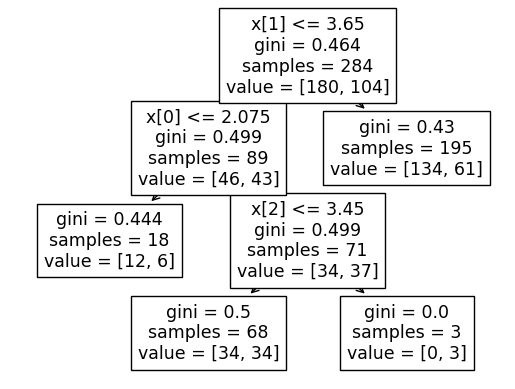

In [112]:
tree.plot_tree(Dtree1);

In [113]:
y_predict = Dtree1.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test, y_predict)

0.6527777777777778